Clean Data

In [5]:
import pandas as pd
df=pd.read_csv('application_data.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
df.drop(['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

Fill Null values with mean, median and mode

In [10]:
df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 116, dtype: int64

In [11]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].median())

In [12]:
df.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 116, dtype: int64

In [13]:
df.dropna()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.to_csv('prediction.csv', index=False)

Predict target

Epoch 1/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - AUC: 0.5129 - loss: 0.3759 - val_AUC: 0.4952 - val_loss: 0.2766
Epoch 2/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - AUC: 0.5057 - loss: 0.2863 - val_AUC: 0.5006 - val_loss: 0.2768
Epoch 3/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - AUC: 0.4838 - loss: 0.2742 - val_AUC: 0.4988 - val_loss: 0.2768
Epoch 4/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 53s 111ms/step - AUC: 0.4790 - loss: 0.2907 - val_AUC: 0.4953 - val_loss: 0.2771
Epoch 5/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 69s 143ms/step - AUC: 0.5241 - loss: 0.2840 - val_AUC: 0.4953 - val_loss: 0.2775
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step
Epoch 1/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.5409 - loss: 0.4372 - val_AUC: 0.7373 - val_loss: 0.2493
Epoch 2/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6612 - loss: 0.2760 - val_AUC: 0.7506 - val_loss: 0.2440
Epoch 3/5
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7079 - loss: 0.2603 - val_AUC: 0.7480 - val_loss: 0.2454
Epoch 4

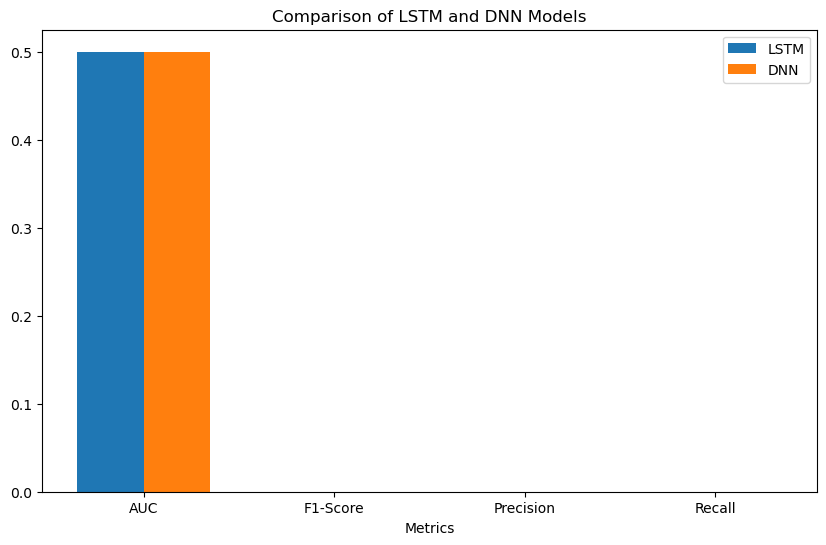

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report, precision_score, recall_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
import joblib
import tensorflow as tf
import warnings

# Bỏ qua cảnh báo
warnings.filterwarnings('ignore')

# Giảm kích thước dữ liệu
df = df.sample(frac=0.25, random_state=42)  # Giữ lại 25% dữ liệu

# Tách cột có kiểu object và các cột số
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Xác định X và y
X = df.drop(columns=['TARGET'], axis=1)
y = df['TARGET']

# Tạo pipeline xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng preprocessor để chuẩn hóa dữ liệu
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Đảm bảo rằng dữ liệu sau khi chuẩn hóa là số (float32)
X_train_lstm = np.expand_dims(X_train, axis=2).astype('float32')
X_test_lstm = np.expand_dims(X_test, axis=2).astype('float32')

# Hàm xây dựng mô hình LSTM
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(16, input_shape=input_shape, return_sequences=False))  # Giảm số lượng neuron
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Xây dựng mô hình LSTM
lstm_model = build_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))

# Huấn luyện mô hình LSTM với early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=2, restore_best_weights=True, mode='max')
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])  # Giảm số epochs

# Dự đoán với mô hình LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).round()

# Hàm xây dựng mô hình DNN
def build_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))  # Giảm số lượng neuron
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Xây dựng và huấn luyện mô hình DNN
dnn_model = build_dnn_model(X_train.shape[1])
dnn_history = dnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])  # Giảm số epochs

# Dự đoán với mô hình DNN
y_pred_dnn = dnn_model.predict(X_test).round()

# Đánh giá mô hình
def evaluate_model(y_test, y_pred, model_name):
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"{model_name} - AUC: {auc}, F1-Score: {f1}, Precision: {precision}, Recall: {recall}")
    return auc, f1, precision, recall

# Đánh giá các mô hình
results = {}
results['LSTM'] = evaluate_model(y_test, y_pred_lstm, 'LSTM')
results['DNN'] = evaluate_model(y_test, y_pred_dnn, 'DNN')

# Trực quan hóa kết quả
metrics = ['AUC', 'F1-Score', 'Precision', 'Recall']
lstm_values = results['LSTM']
dnn_values = results['DNN']

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, lstm_values, width, label='LSTM')
bar2 = ax.bar(x + width/2, dnn_values, width, label='DNN')

ax.set_xlabel('Metrics')
ax.set_title('Comparison of LSTM and DNN Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

# Lưu các mô hình
lstm_model.save('lstm_model.keras')
dnn_model.save('dnn_model.keras')
